# Sentiment Analysis

**Done By:** Yazan AL Hroob

#### This Notebook is divided to two parts:
-  **Part 1**: Using data provided by Dr. Mohammad (Trump related Tweets)
  - Data cleaning using REGEX
  - Word Clouds
  - stop words removal
  - Lemmatization
  - Vader Sentiment Analyzer:
        - Detecting the tweet sentiment
            - *Positive*
            - *Negative*
            - *Neutral*
            - *Compound*
            
            
-  **Part 2**: Using the training data `train.csv` located at `data` folder in `Proj_03_Emotions/` 
  - Analytical process and Plotting
  - Data cleaning using REGEX
  - Word Clouds
  - stop words removal
  - Lemmatization
  - Using `TFIDF` Vectorizer instead of bag of word technique.
  - Building classifier based on splitted data:
        - classify the tweet based on sentiments
            - *Positive*
            - *Negative*
            - *Neutral*
        - Classifiers used:
            - SVC with RBF kernel
            - XGBOOST Classifier
            - Logistic Regression

## Part 1

In [1]:
import numpy as np
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('punkt')
# nltk.download('brown')
# nltk.download('vader_lexicon')

In [3]:
tweets = pd.read_csv('Trump.csv')['Content']

In [4]:
tweets

0     【Popular No.1 Topics in United States of Ameri...
1     #Facebook When You Are Done Suspending #US #Do...
2     @ihatecodee BUY and Sell #Bitcoin on #Burency_...
3     @KlausLovgreen Trade on the #burency_exchange ...
4     @TheMoonCarl Trade #Bitcoin  on #Burency_excha...
5     #politics NEW LINKS TO REMOVING TRUMP #Donald_...
6     #politics More LINKS TO REMOVING TRUMP #Donald...
7     #Donald_Trump \r\n\r\nI demand Human Rights in...
8     @amhfarraj \r\n\r\n@obai1d \r\n\r\nI trust you...
9     #politics LINKS TO REMOVING TRUMP #Donald_Trum...
10    Every #Social_Media Platform #Donald_Trump is ...
11    Donald Trump 24/7 Live Music, Chillout Music \...
12    I support the president #donald_trump \r\n\r\n...
13    Who's biggest extremist \r\n#Kapil_mishra \r\n...
14    The president's new account\r\n#Trumb\r\n#Dona...
15    #Twitter has permanently #suspended the #accou...
16    Twitter has decided to permanently ban #Donald...
17    China🇨🇳 has state-run media \r\nthe USA🇺🇸 

In [5]:
def clean_tweets(tweet):
    
    # remove URL
    tweet = re.sub(r"http\S+", "", tweet)
    
    # Remove usernames
    tweet = re.sub(r"@[^\s]+[\s]?",'',tweet)
    
    # remove special characters 
    tweet = re.sub('[^ a-zA-Z0-9]', '', tweet)
    
    # remove Numbers
    tweet = re.sub('[0-9]', '', tweet)
    
    return tweet

In [6]:
tweets = tweets.map(lambda x: clean_tweets(x))

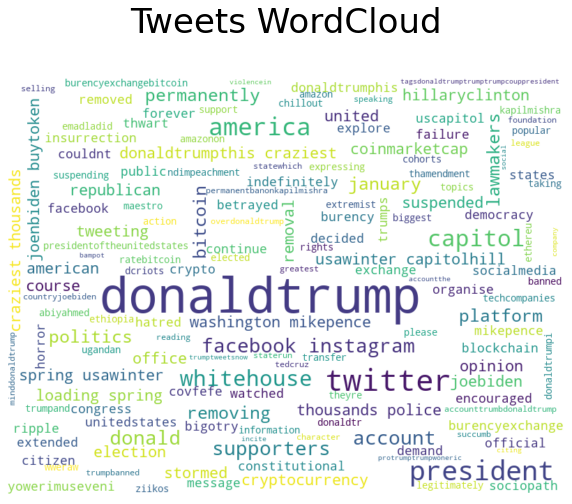

In [7]:
Data=' '.join(tweets.values)
stops=['the','and','that','for','with','this','for','was','you','about']
tokens =[word.lower() for word in Data.split() if len(word)>5 and word.lower() not in stops ]
Data=' '.join(tokens)


wordcloud = WordCloud(max_font_size=70, max_words=150, background_color="white",width=800, height=600).generate(Data)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Tweets WordCloud\n', fontsize=34)
plt.show()

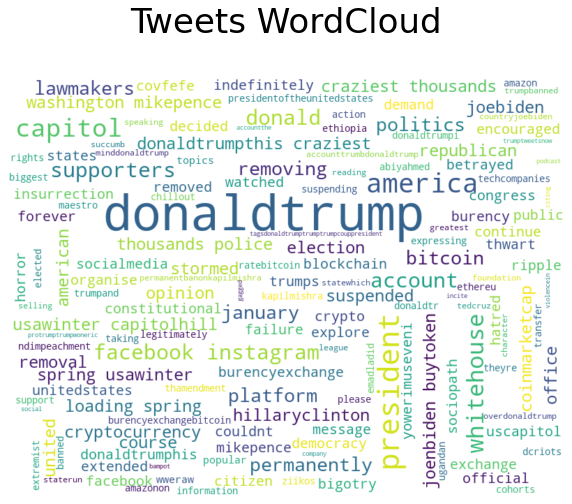

In [8]:
Data=' '.join(tweets.values)
stops=['the','and','that','for','with','this','for','was','you','about', 'twitter', 'tweeting']
tokens =[word.lower() for word in Data.split() if len(word)>5 and word.lower() not in stops ]
Data=' '.join(tokens)


wordcloud = WordCloud(max_font_size=70, max_words=150, background_color="white",width=800, height=600).generate(Data)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Tweets WordCloud\n', fontsize=34)
plt.show()

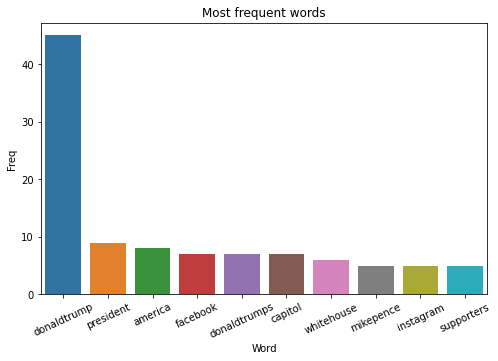

In [9]:
Dataa=' '.join(tweets.values)
tokens =[word.lower() for word in Dataa.split() if len(word)>6 and word.lower() not in stops ]
dictWords=Counter(tokens).most_common(20)
Words=[i[0] for i in dictWords]
Freq=[i[1] for i in dictWords]
DF=pd.DataFrame({'Word':Words,'Freq':Freq})
plt.figure(figsize=(8,5))
sns.barplot(x=DF['Word'][0:10],y=DF['Freq'][0:10])
plt.title(f'Most frequent words')
plt.xticks(rotation=25, ha='center')
plt.show()

In [10]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [11]:
stops = stopwords.words('english')

In [12]:
stops.extend(['twitter','tweeting'])

In [13]:
print(stops)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [14]:
[WordNetLemmatizer().lemmatize(w) for w in word_tokenize(tweets[0]) if w not in stops]

['Popular',
 'No',
 'Topics',
 'United',
 'States',
 'America',
 'DonaldTrump',
 'WWERaw',
 'PresidentoftheUnitedStates',
 'Why',
 'WWE',
 'hasnt',
 'talke']

In [15]:
tweets = tweets.map(lambda x: ' '.join([WordNetLemmatizer().lemmatize(w).lower() for w in word_tokenize(x) if w not in stops]))

In [16]:
vader_analyzer = SentimentIntensityAnalyzer()

In [17]:
vader_analyzer.polarity_scores(tweets[26])

{'neg': 0.0, 'neu': 0.866, 'pos': 0.134, 'compound': 0.3412}

In [18]:
dic = {'neg': 'Negative', 'neu': 'Neutral', 'pos': 'Positive', 'compound': 'Compound'}
def Analyzer(tweet):
    scores = vader_analyzer.polarity_scores(tweet)
    max_key = max(scores, key=lambda k: scores[k])
    return dic[max_key]#, scores[max_key]

In [19]:
tweets.map(lambda x : Analyzer(x))[:5]

0     Neutral
1    Compound
2     Neutral
3     Neutral
4     Neutral
Name: Content, dtype: object

In [20]:
tweets = tweets.to_frame()

In [21]:
tweets['Sentiment'] = tweets['Content'].map(lambda x : Analyzer(x))

In [22]:
tweets.head()

,Content,Sentiment
0,popular no topics united states america donald...,Neutral
1,facebook when you are done suspending us donal...,Compound
2,buy sell bitcoin burencyexchange facts fees lo...,Neutral
3,trade burencyexchange bitcoin dv bitcoin news ...,Neutral
4,trade bitcoin burencyexchangebitcoin news joen...,Neutral


In [23]:
tweets['Sentiment'].unique().tolist()

['Neutral', 'Compound', 'Positive', 'Negative']

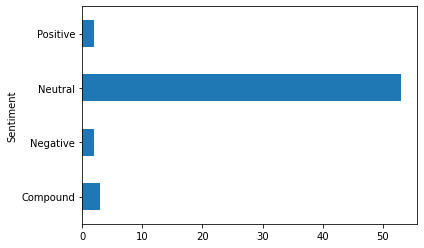

In [24]:
tweets.groupby('Sentiment').size().plot(kind='barh');

In [25]:
tweets.groupby('Sentiment').count()

,Content
Sentiment,
Compound,3
Negative,2
Neutral,53
Positive,2


# Part 2

In [26]:
DF = pd.read_csv('train.csv')

In [27]:
DF.drop(columns='Id', inplace=True)

In [28]:
DF

,Category,Tweet
0,negative,Not Available
1,neutral,IOS 9 App Transport Security. Mm need to check...
2,neutral,"Mar if you have an iOS device, you should down..."
3,negative,@jimmie_vanagon my phone does not run on lates...
4,positive,Not sure how to start your publication on iOS?...
...,...,...
5965,neutral,@YouAreMyArsenal Wouldn't surprise me if we en...
5966,neutral,Rib injury for Zlatan against Russia is a big ...
5967,neutral,Noooooo! I was hoping to see Zlatan being Zlat...
5968,neutral,Not Available


In [29]:
DF['Category'].value_counts()

positive    2888
neutral     2125
negative     956
Tweet          1
Name: Category, dtype: int64

<AxesSubplot:>

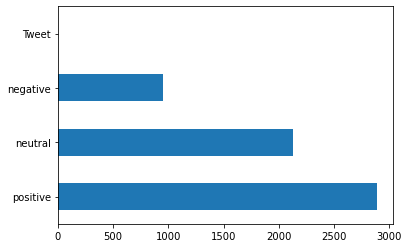

In [30]:
DF['Category'].value_counts().plot(kind='barh')

In [31]:
DF.drop(DF[DF['Tweet']=='Not Available'].index, inplace=True)

In [32]:
DF

,Category,Tweet
1,neutral,IOS 9 App Transport Security. Mm need to check...
2,neutral,"Mar if you have an iOS device, you should down..."
3,negative,@jimmie_vanagon my phone does not run on lates...
4,positive,Not sure how to start your publication on iOS?...
5,neutral,"Two Dollar Tuesday is here with Forklift 2, Qu..."
...,...,...
5963,positive,"Ok ed let's do this, Zlatan, greizmann and Lap..."
5964,neutral,Goal level: Zlatan 90k by Friday? = Posting e...
5965,neutral,@YouAreMyArsenal Wouldn't surprise me if we en...
5966,neutral,Rib injury for Zlatan against Russia is a big ...


In [33]:
DF.drop(DF[DF['Category']=='Tweet'].index, inplace=True)

<AxesSubplot:>

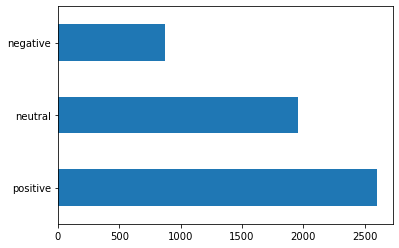

In [34]:
DF['Category'].value_counts().plot(kind='barh')

In [35]:
DF.drop(DF[DF['Category']=='Tweet'].index, inplace=True)

In [36]:
DF['Tweet'] = DF['Tweet'].map(lambda x: clean_tweets(x))

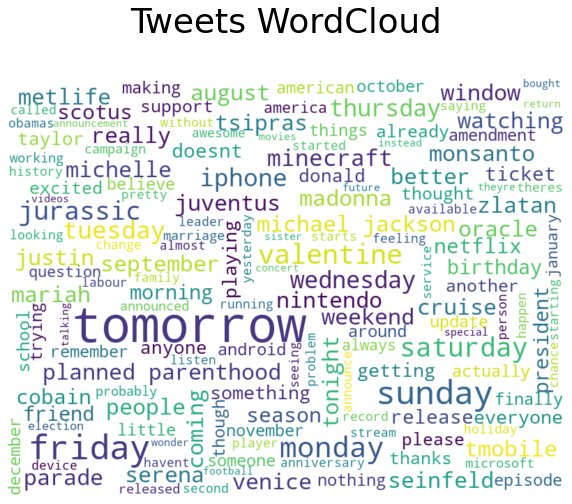

In [37]:
Data=' '.join(DF['Tweet'].values)
stops=['the','and','that','for','with','this','for','was','you','about']
tokens =[word.lower() for word in Data.split() if len(word)>5 and word.lower() not in stops ]
Data=' '.join(tokens)


wordcloud = WordCloud(max_font_size=70, max_words=150, background_color="white",width=800, height=600).generate(Data)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Tweets WordCloud\n', fontsize=34)
plt.show()

In [38]:
DF['Tweet'] = DF['Tweet'].map(lambda x: ' '.join([WordNetLemmatizer().lemmatize(w).lower() for w in word_tokenize(x) if w not in stops]))

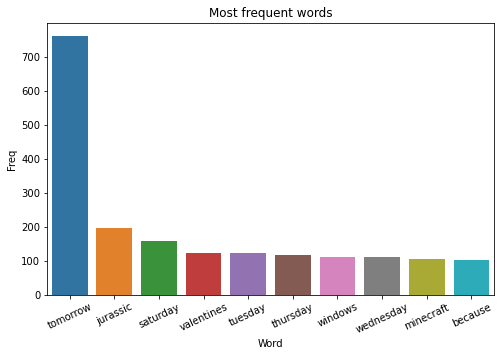

In [39]:
Dataa=' '.join(DF['Tweet'].values)
tokens =[word.lower() for word in Dataa.split() if len(word)>6 and word.lower() not in stops ]
dictWords=Counter(tokens).most_common(20)
Words=[i[0] for i in dictWords]
Freq=[i[1] for i in dictWords]
df=pd.DataFrame({'Word':Words,'Freq':Freq})
plt.figure(figsize=(8,5))
sns.barplot(x=df['Word'][0:10],y=df['Freq'][0:10])
plt.title(f'Most frequent words')
plt.xticks(rotation=25, ha='center')
plt.show()

In [40]:
stops.extend(['tomorrow','saturday','sunday','monday','tuesday','wednesday','thursday','friday'])

In [41]:
DF['Tweet'] = DF['Tweet'].map(lambda x: ' '.join([w for w in word_tokenize(x) if w not in stops]))

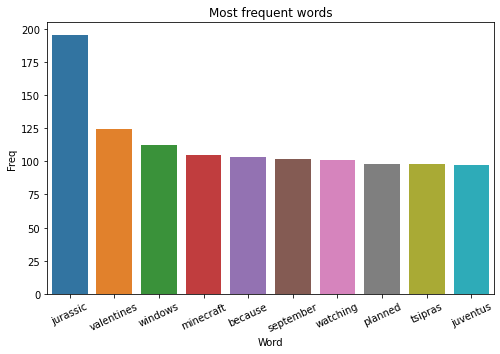

In [42]:
Dataa=' '.join(DF['Tweet'].values)
tokens =[word.lower() for word in Dataa.split() if len(word)>6 and word.lower() not in stops ]
dictWords=Counter(tokens).most_common(20)
Words=[i[0] for i in dictWords]
Freq=[i[1] for i in dictWords]
df=pd.DataFrame({'Word':Words,'Freq':Freq})
plt.figure(figsize=(8,5))
sns.barplot(x=df['Word'][0:10],y=df['Freq'][0:10])
plt.title(f'Most frequent words')
plt.xticks(rotation=25, ha='center')
plt.show()

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split

In [44]:
 X_train, X_test, y_train, y_test = train_test_split(DF['Tweet'], DF['Category'], test_size=0.2, random_state=42)

In [45]:
vect = TfidfVectorizer()

In [46]:
X_train_vect = vect.fit_transform(X_train)

In [47]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [64]:
svc = SVC(C=20)
svc.fit(X_train_vect, y_train)
svc_preds = svc.predict(vect.transform(X_test))
print(classification_report(y_test, svc_preds))

              precision    recall  f1-score   support

    negative       0.51      0.19      0.28       176
     neutral       0.42      0.49      0.45       359
    positive       0.67      0.74      0.70       550

    accuracy                           0.57      1085
   macro avg       0.53      0.47      0.48      1085
weighted avg       0.56      0.57      0.55      1085



In [49]:
from xgboost import XGBClassifier

In [50]:
xgb = XGBClassifier(n_estimators=100, max_depth=8)
xgb.fit(X_train_vect, y_train)
xgb_preds = xgb.predict(vect.transform(X_test))
print(classification_report(y_test, xgb_preds))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:20:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

    negative       0.51      0.20      0.29       176
     neutral       0.43      0.43      0.43       359
    positive       0.63      0.75      0.69       550

    accuracy                           0.56      1085
   macro avg       0.53      0.46      0.47      1085
weighted avg       0.55      0.56      0.54      1085



In [56]:
vader_preds = X_test.map(lambda x : Analyzer(x).lower())

In [58]:
print(classification_report(y_test, vader_preds))

              precision    recall  f1-score   support

    compound       0.00      0.00      0.00         0
    negative       0.71      0.03      0.05       176
     neutral       0.36      0.91      0.52       359
    positive       0.00      0.00      0.00       550

    accuracy                           0.31      1085
   macro avg       0.27      0.24      0.14      1085
weighted avg       0.23      0.31      0.18      1085



In [61]:
vader_preds.value_counts()

neutral     912
compound    166
negative      7
Name: Tweet, dtype: int64

In [65]:
from sklearn.linear_model import LogisticRegression

In [67]:
lr = LogisticRegression()
lr.fit(X_train_vect, y_train)
lr_preds = lr.predict(vect.transform(X_test))
print(classification_report(y_test, lr_preds))

              precision    recall  f1-score   support

    negative       0.54      0.15      0.23       176
     neutral       0.44      0.47      0.45       359
    positive       0.65      0.77      0.70       550

    accuracy                           0.57      1085
   macro avg       0.54      0.46      0.46      1085
weighted avg       0.56      0.57      0.54      1085

